# Fundamental Analysis
This notebook plots various fundamental statistics of different stocks.  
These links were helpful:  
https://simply-python.com/2015/02/13/getting-historical-financial-statistics-of-stock-using-python/
http://stackoverflow.com/questions/40139537/scrape-yahoo-finance-financial-ratios  
https://automatetheboringstuff.com/chapter11/  

In [12]:
import pandas as pd
import numpy as np
import requests
from pprint import pprint as pp
import matplotlib.pyplot as plt
from pattern.web import URL
%matplotlib inline

In [2]:
tickers = pd.read_csv('csv/tsx60.csv',delimiter=",")
print tickers["Sector"].unique()
tickers.head()

['Materials' 'Consumer Staples' 'Energy' 'Financials'
 'Telecommunication Services' 'Information Technology' 'Industrials'
 'Consumer Discretionary' 'Utilities' 'Health Care']


,Symbol,Company,Sector
0,AEM.TO,Agnico Eagle Mines Limited,Materials
1,AGU.TO,Agrium Inc.,Materials
2,ATD-B.TO,Alimentation Couche-Tard Inc.,Consumer Staples
3,ARX.TO,ARC Resources Ltd.,Energy
4,BMO.TO,Bank of Montreal,Financials


In [31]:
stock = "AGU"
webpage = "http://financials.morningstar.com/ajax/exportKR2CSV.html?t=%s&culture=en-CA&region=USA&order=asc&r=314562"%stock
url = URL(webpage)
f = open('Fundamental_Analysis/%s_keyratios.csv'%stock, 'wb') # save as test.gif
f.write(url.download())
f.close()

In [72]:
def get_stock_financials(stock):
    path = "Fundamental_Analysis/"
    try:
        d = pd.read_csv('%s%s_keyratios.csv'%(path, stock), header=2, index_col=0,
                skiprows = [19,20,31,41,42,43,48,58,53,64,65,72,73,95,101,102])
    except:
        webpage = "http://financials.morningstar.com/ajax/exportKR2CSV.html?t=%s&culture=en-CA&region=USA&order=asc&r=314562"%stock
        url = URL(webpage)
        f = open('%s%s_keyratios.csv'%(path, stock), 'wb') # save as test.gif
        f.write(url.download())
        f.close()
        d = pd.read_csv('%s%s_keyratios.csv'%(path, stock), header=2, index_col=0,
                    skiprows = [19,20,31,41,42,43,48,58,53,64,65,72,73,95,101,102])
    d = d.transpose().reset_index()
    d = d.dropna(axis='columns', how='all')
    return d

In [69]:
data = get_stock_financials("AW.UN")
data.head()

hello


,index,Revenue CAD Mil,Gross Margin %,Operating Income CAD Mil,Operating Margin %,Net Income CAD Mil,Earnings Per Share CAD,Dividends CAD,Payout Ratio % *,Shares Mil,...,Total Liabilities,Total Stockholders' Equity,Total Liabilities & Equity,Current Ratio,Quick Ratio,Financial Leverage,Debt/Equity,Days Sales Outstanding,Receivables Turnover,Asset Turnover
0,2006-12,9.0,100.0,9.0,100.0,11.0,1.32,1.16,NaN,8.0,...,1.12,98.88,100.0,0.98,0.98,1.01,NaN,32.73,11.15,0.12
1,2007-12,9.0,100.0,9.0,100.0,11.0,1.27,1.23,96.5,8.0,...,1.18,98.82,100.0,0.98,0.98,1.01,NaN,35.50,10.28,0.12
2,2008-12,9.0,100.0,9.0,100.0,12.0,1.42,1.27,89.4,8.0,...,1.20,98.80,100.0,0.98,0.98,1.01,NaN,33.71,10.83,0.12
3,2009-12,9.0,100.0,9.0,100.0,12.0,1.39,1.27,91.3,8.0,...,1.20,98.80,100.0,0.98,0.98,1.01,NaN,30.94,11.80,0.12
4,2010-12,800.0,100.0,15.0,1.8,-46.0,-5.47,1.27,88.5,8.0,...,1.22,98.78,100.0,0.98,0.98,1.01,NaN,15.88,22.98,0.12


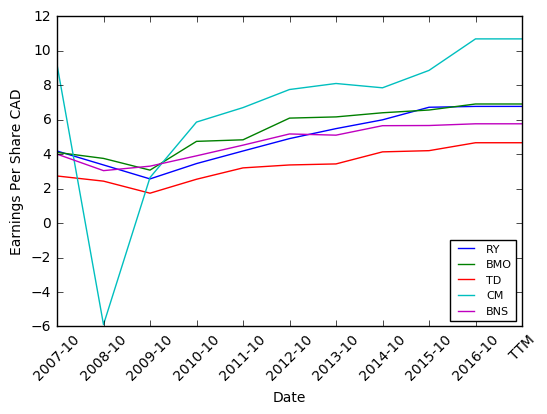

In [91]:
stocks = ['RY', 'BMO', 'TD', 'CM', 'BNS']
var = "Earnings Per Share CAD"
for s in stocks:
    d = get_stock_financials(s)
    y = d[var]
    plt.plot(y, label=s)

plt.xticks(range(len(y)), d['index'], rotation=45);
plt.legend(loc='lower right', fontsize=8);
plt.ylabel(var)
plt.xlabel("Date")